For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.

In [1]:
#Requisite libraries for analysis

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# Intro 

For this project I will be investigating the relationship that a number of variables have to a penguins weight. This is inspired by the dataset in increasingly greater use in data analytics called the ```palmer penguin``` dataset. This dataset is been touted as a replacement for the Fisher's Iris as a more ethical version to use. [1] Because of Fisher's links to eugenics, some analysts and computer scientists are uncomforable using this set. 

The ```palmer penguins``` are collected and published by [Dr.Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and [Allison Horst](https://www.allisonhorst.com). The data in this set is collected from the Palmer Archipelago in Antartica and covers a large number of variables, which we will briefly look at below. The dataset is used under the CC-0 licence. 


[1]: https://towardsdatascience.com/data-analysis-in-python-getting-started-with-pandas-8cbcc1500c83

In [2]:
penguins = pd.read_csv("https://raw.githubusercontent.com/kaob1991/Programming-project/main/penguins_lter.csv")

In [3]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


To make it easier to compare the variables, especially with correlation later in the project, we are removing the Sample number of the penguins and the blood isotopes as these are not pertinent to the investigation. 

In [4]:
penguins = penguins.drop(["Sample Number","Delta 15 N (o/oo)", "Delta 13 C (o/oo)"], axis = 1)
penguins

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Comments
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,Not enough blood for isotopes.
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,NaN
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,NaN
3,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,NaN
341,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,NaN
342,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,NaN


We can see from that data set that it covers a wide range of variables. There is culmen length, depth, flipper length, and sex; as well as the variable we will be investigating, the Body mass in grams. In this data set the max weight of a participant is 6300.0 grams, whereas the minimum is 2700.0 grams. This implies a substantial weight difference of almost twice as big. 


In [5]:
weight = penguins["Body Mass (g)"]
min_weight = weight.min()
min_weight

2700.0

In [6]:
max_weight = weight. max()
max_weight

6300.0

One thing that may explain the size differential of the subjects is the species type. There are 3 types of penguin in the current dataset. The Adelie Penguin, the Gentoo penguin, and the Chinstrap penguin. There looks to be more data available for the Adelie and Gentoo Penguin than the Chinstrap in this dataset. Below is a picture detailing the physical appearance of the 3 species.

![Chinstrap Penguin](https://raw.githubusercontent.com/kaob1991/Programming-project/main/pengiuns.jpeg)

In [7]:
penguins["Species"].value_counts()


Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

The other variable that is commonly associated with a weight differential is sex, with the males of most species of animals often weighing more. The scatterplot below would seem to add credence to that theory where the males consistently weigh more than the females. It also would seem that the "Gentoo" species is a overall heavier bird than the Adelie and the Chinstrap penguin. Interestingly, the Chinstrap penguin looks to have a slightly greater variance overall in weight, when accounting for the number of variables in the data. 

<AxesSubplot:xlabel='Species', ylabel='Body Mass (g)'>

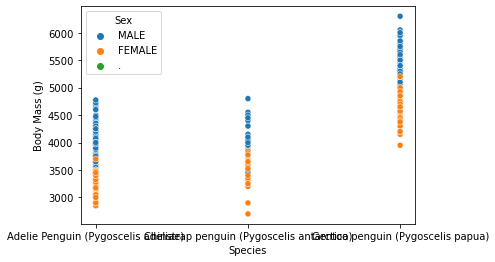

In [8]:
sns.scatterplot(data = penguins, x = "Species",y= "Body Mass (g)", hue = "Sex")

After establishing there is possibly a relationship between the sex of the penguin, and body mass, the next step is to split the dataset into three, based on the species type. This will allow us have a clearer distribution of the data above, and to continue our investigation, and simulation of the data. 

In [9]:
adelie_data = penguins.loc [penguins ["Species"] == "Adelie Penguin (Pygoscelis adeliae)"]
chinstrap_data = penguins.loc [penguins ["Species"] == "Chinstrap penguin (Pygoscelis antarctica)"]
gentoo_data = penguins.loc [penguins ["Species"] == "Gentoo penguin (Pygoscelis papua)"]


## Histograms of body weight
***
The body weights of the birds are drawm below. I've also added a kernel density estimate (KDE) as this will help smooth the data out and provide a clearer view of data trends. 
<br>

There are 3 histograms below relating to the body weight of the 3 birds in the following order:
- Gentoo Penguin
- Adelie Penguin
- Chinstrap penguin

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Count'>

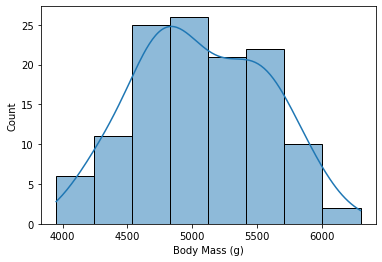

In [10]:
sns.histplot(data = gentoo_data,x = "Body Mass (g)", kde = True)

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Count'>

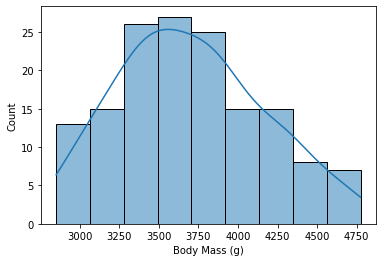

In [11]:
sns.histplot(data = adelie_data,x = "Body Mass (g)", kde = True)

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Count'>

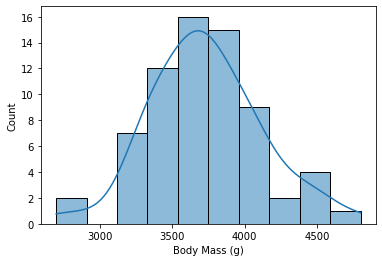

In [12]:
sns.histplot(data = chinstrap_data,x = "Body Mass (g)", kde = True)

# Chinstrap scatterplots

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

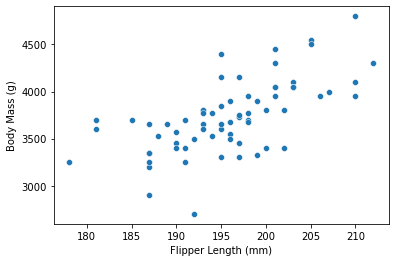

In [13]:
sns.scatterplot(data= chinstrap_data, x="Flipper Length (mm)", y="Body Mass (g)")


<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Body Mass (g)'>

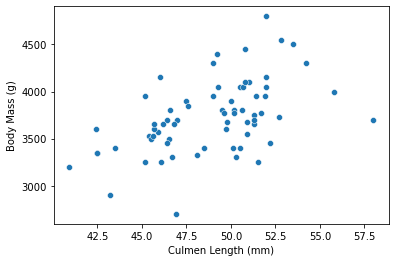

In [14]:
sns.scatterplot(data= chinstrap_data, x="Culmen Length (mm)", y="Body Mass (g)")

<AxesSubplot:xlabel='Culmen Depth (mm)', ylabel='Body Mass (g)'>

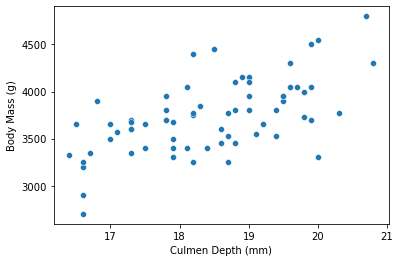

In [15]:
sns.scatterplot(data= chinstrap_data, x="Culmen Depth (mm)", y="Body Mass (g)")

In [16]:
chinstrap_data.corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Culmen Length (mm),1.000000,0.653536,0.471607,0.513638
Culmen Depth (mm),0.653536,1.000000,0.580143,0.604498
Flipper Length (mm),0.471607,0.580143,1.000000,0.641559
Body Mass (g),0.513638,0.604498,0.641559,1.000000


# Adelie Scatterplots

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

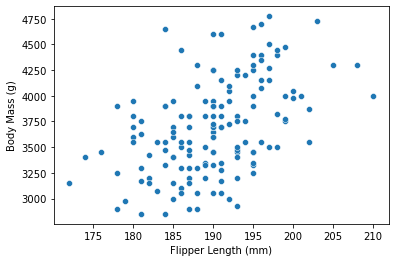

In [17]:
sns.scatterplot(data= adelie_data, x="Flipper Length (mm)", y="Body Mass (g)")

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Body Mass (g)'>

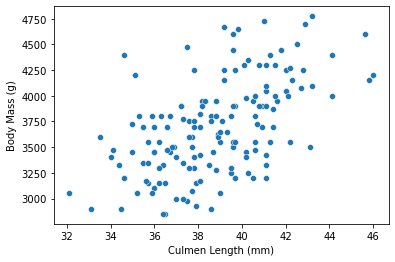

In [18]:
sns.scatterplot(data= adelie_data, x="Culmen Length (mm)", y="Body Mass (g)")

<AxesSubplot:xlabel='Culmen Depth (mm)', ylabel='Body Mass (g)'>

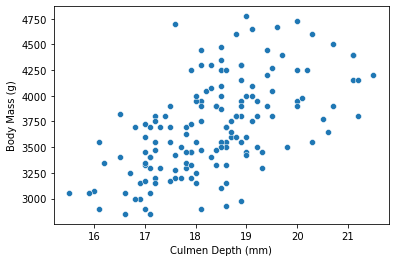

In [19]:
sns.scatterplot(data= adelie_data, x="Culmen Depth (mm)", y="Body Mass (g)")

In [20]:
adelie_data.corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Culmen Length (mm),1.000000,0.391492,0.325785,0.548866
Culmen Depth (mm),0.391492,1.000000,0.307620,0.576138
Flipper Length (mm),0.325785,0.307620,1.000000,0.468202
Body Mass (g),0.548866,0.576138,0.468202,1.000000


# GEntoo Scatterplots

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

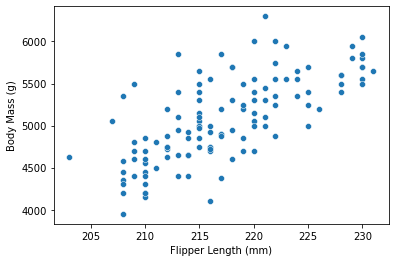

In [21]:
sns.scatterplot(data= gentoo_data, x="Flipper Length (mm)", y="Body Mass (g)")

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Body Mass (g)'>

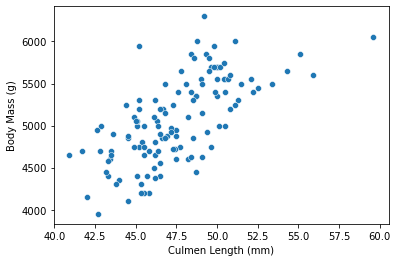

In [22]:
sns.scatterplot(data= gentoo_data, x="Culmen Length (mm)", y="Body Mass (g)")

<AxesSubplot:xlabel='Culmen Depth (mm)', ylabel='Body Mass (g)'>

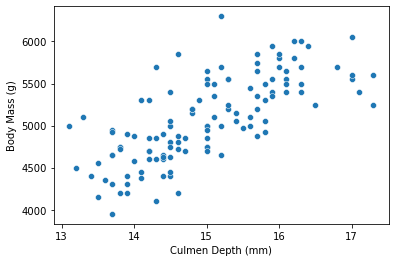

In [23]:
sns.scatterplot(data= gentoo_data, x="Culmen Depth (mm)", y="Body Mass (g)")

In [24]:
gentoo_data.corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Culmen Length (mm),1.000000,0.643384,0.661162,0.669166
Culmen Depth (mm),0.643384,1.000000,0.706563,0.719085
Flipper Length (mm),0.661162,0.706563,1.000000,0.702667
Body Mass (g),0.669166,0.719085,0.702667,1.000000


Having investigated the correlation between body mass and the other 3 variables of each of the species the only one that has a strong relationship is the Gentoo. Therefore we will continue our investigations using just this species as the body mass is a good predictor of the other variables. 

# REFERENCES

-https://towardsdatascience.com/data-analysis-in-python-getting-started-with-pandas-8cbcc1500c83